In [1]:
import torch
import torchvision
import numpy as np, os
import matplotlib.pyplot as plt

In [2]:
figsize = (8, 6)
dpi = 300

In [3]:
from utility_scripts.backbone_utils.backbones import build_model
from utility_scripts.utility_functions import evaluate_backbone

In [4]:
adaface_models = {
    'ir_101':"data/models/AdaFace/adaface_ir101_webface12m.ckpt",
}

def load_pretrained_model(architecture='ir_50'):
    # load model and pretrained statedict
    assert architecture in adaface_models.keys()
    model = build_model(architecture)
    statedict = torch.load(adaface_models[architecture])['state_dict']
    model_statedict = {key[6:]:val for key, val in statedict.items() if key.startswith('model.')}
    model.load_state_dict(model_statedict)
    model.eval()
    return model

model = load_pretrained_model('ir_101')
model.to('cuda')

Backbone(
  (input_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): PReLU(num_parameters=64)
  )
  (output_layer): Sequential(
    (0): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Dropout(p=0.4, inplace=False)
    (2): Flatten()
    (3): Linear(in_features=25088, out_features=512, bias=True)
    (4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  )
  (body): Sequential(
    (0): BasicBlockIR(
      (shortcut_layer): MaxPool2d(kernel_size=1, stride=2, padding=0, dilation=1, ceil_mode=False)
      (res_layer): Sequential(
        (0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (2): BatchNorm2d(64, eps=1e-05, momentum=0.1

In [5]:
metrics = evaluate_backbone(model)

Processing dataset: LFW...
Finished processing LFW.
Processing dataset: CPLFW...
Finished processing CPLFW.
Processing dataset: CALFW...
Finished processing CALFW.
Processing dataset: CFP-FP...
Finished processing CFP-FP.
Processing dataset: CFP-FF...
Finished processing CFP-FF.


LFW dataset got:
	99.36666667 accuracy.
	99.76565731 precision.
	98.96666667 recall.
	99.36353476 f1_score.
CPLFW dataset got:
	94.96666667 accuracy.
	98.23571530 precision.
	91.55524415 recall.
	94.75585997 f1_score.
CALFW dataset got:
	95.95000000 accuracy.
	99.64331775 precision.
	92.23355867 recall.
	95.78415144 f1_score.
CFP-FP dataset got:
	97.62832618 accuracy.
	99.75961448 precision.
	95.48473189 recall.
	97.56708290 f1_score.
CFP-FF dataset got:
	99.88565297 accuracy.
	99.94301994 precision.
	99.82832583 recall.
	99.88534441 f1_score.


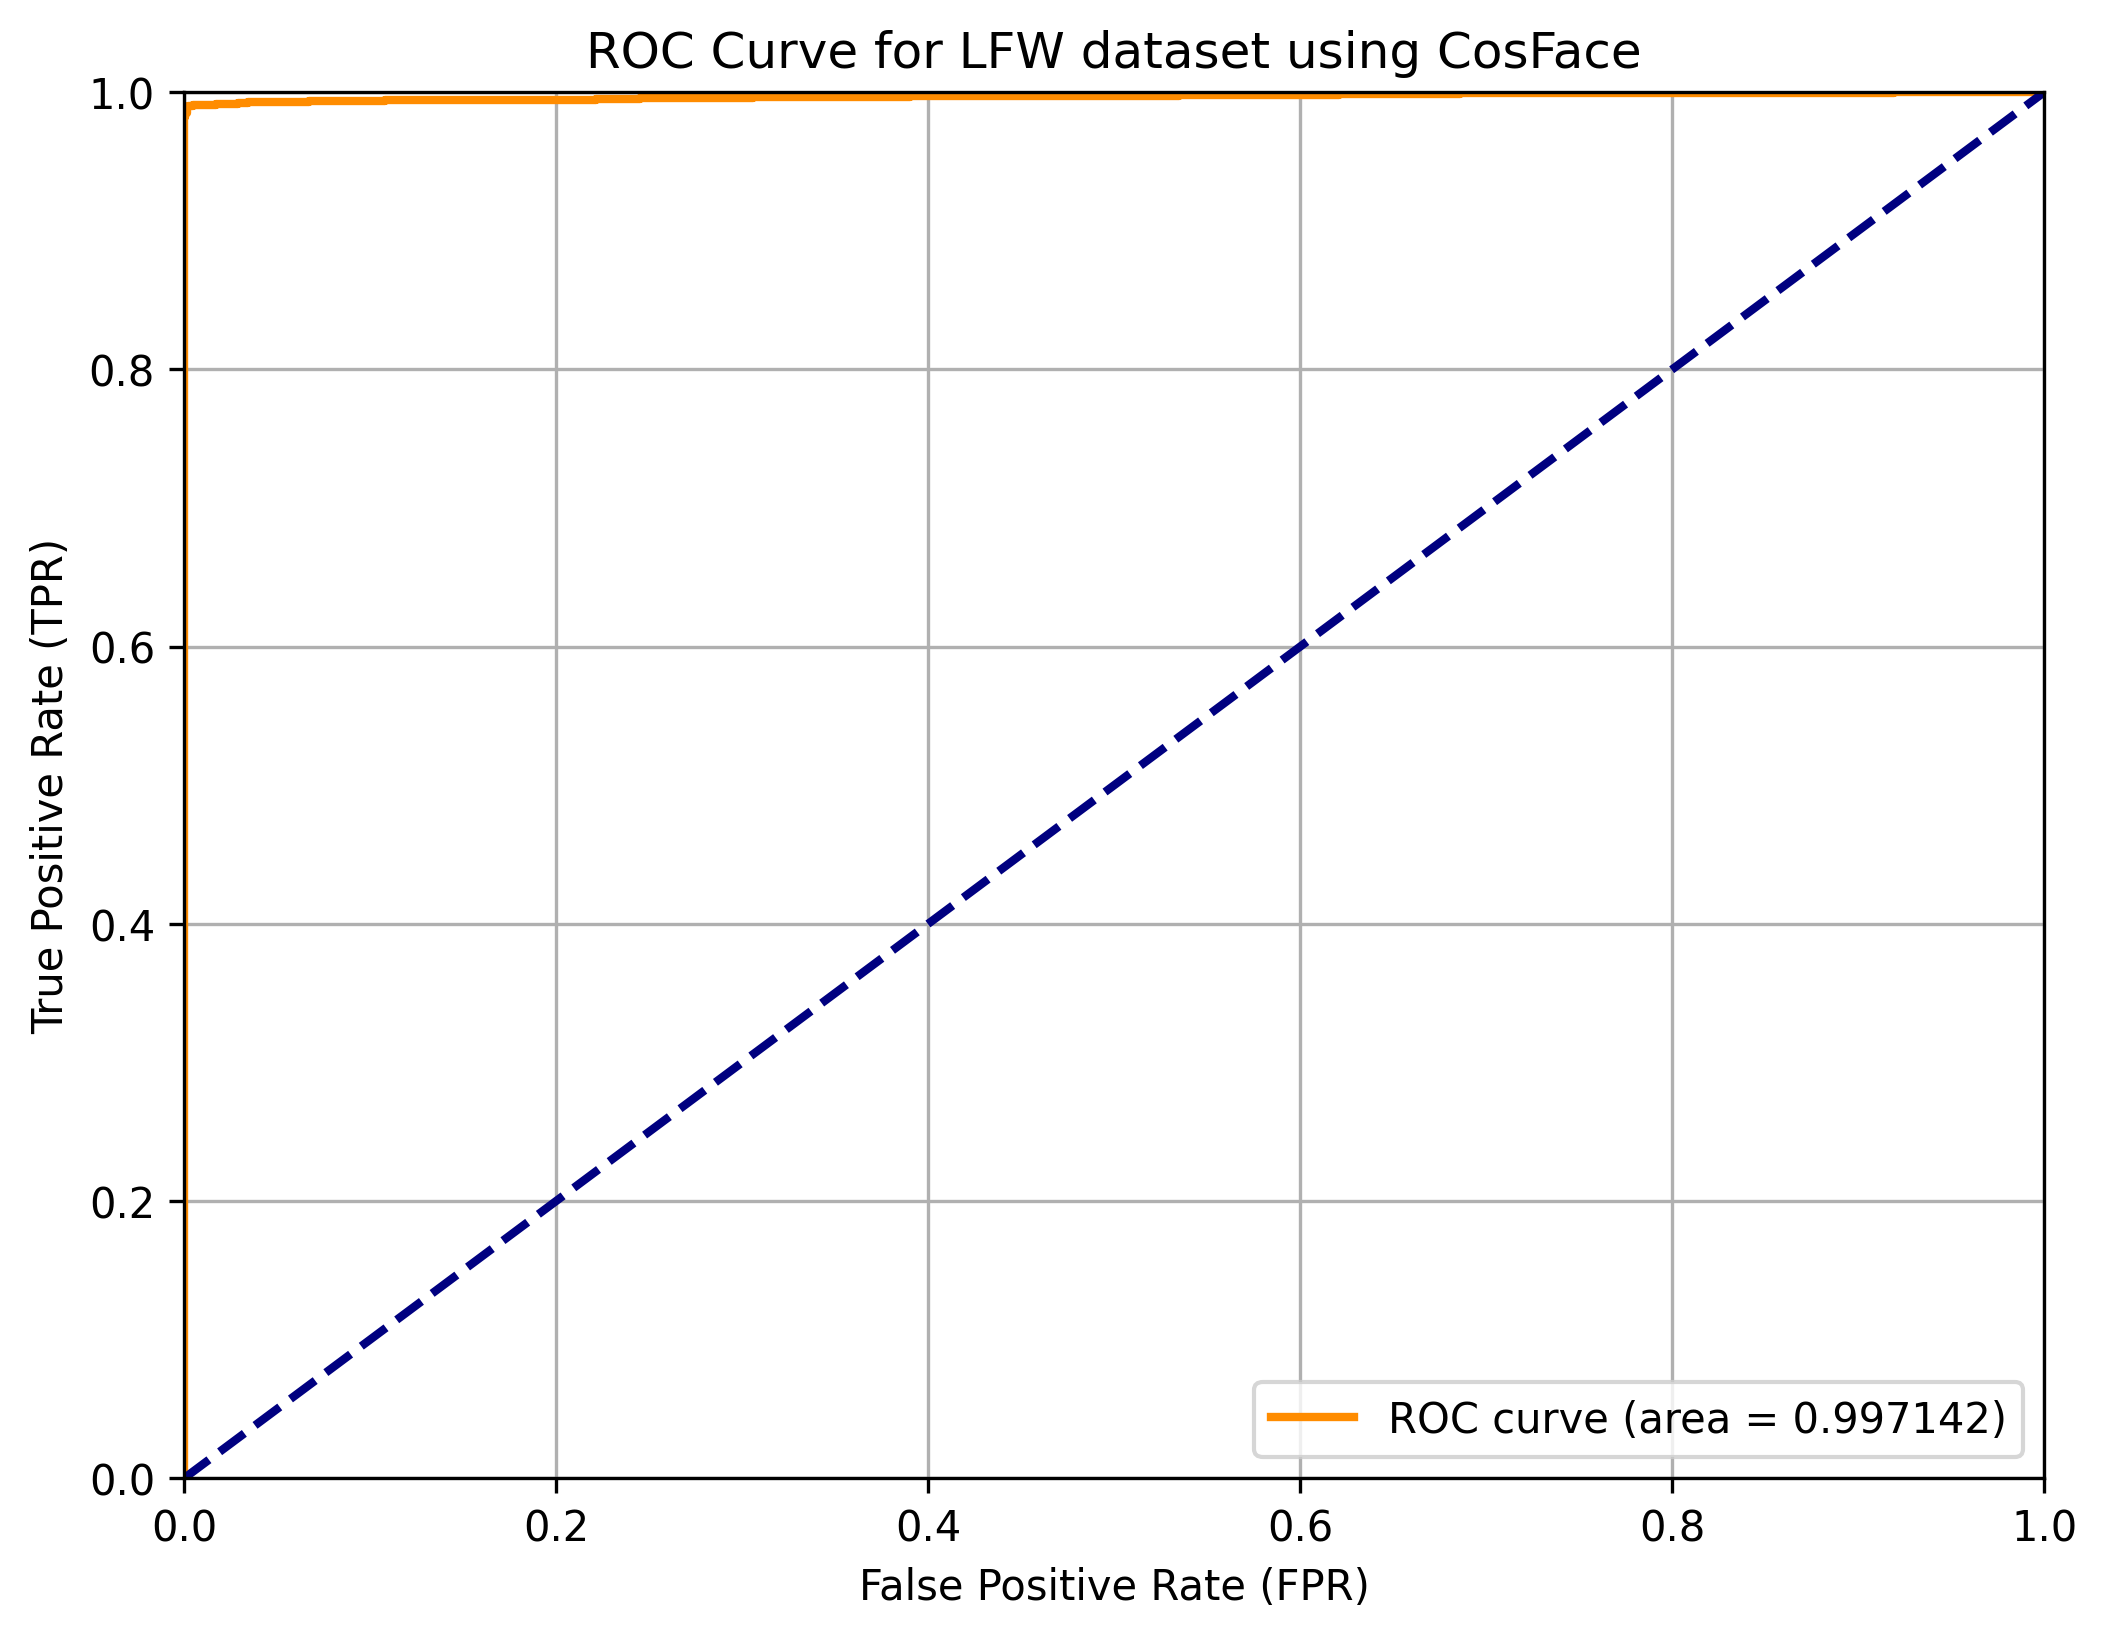

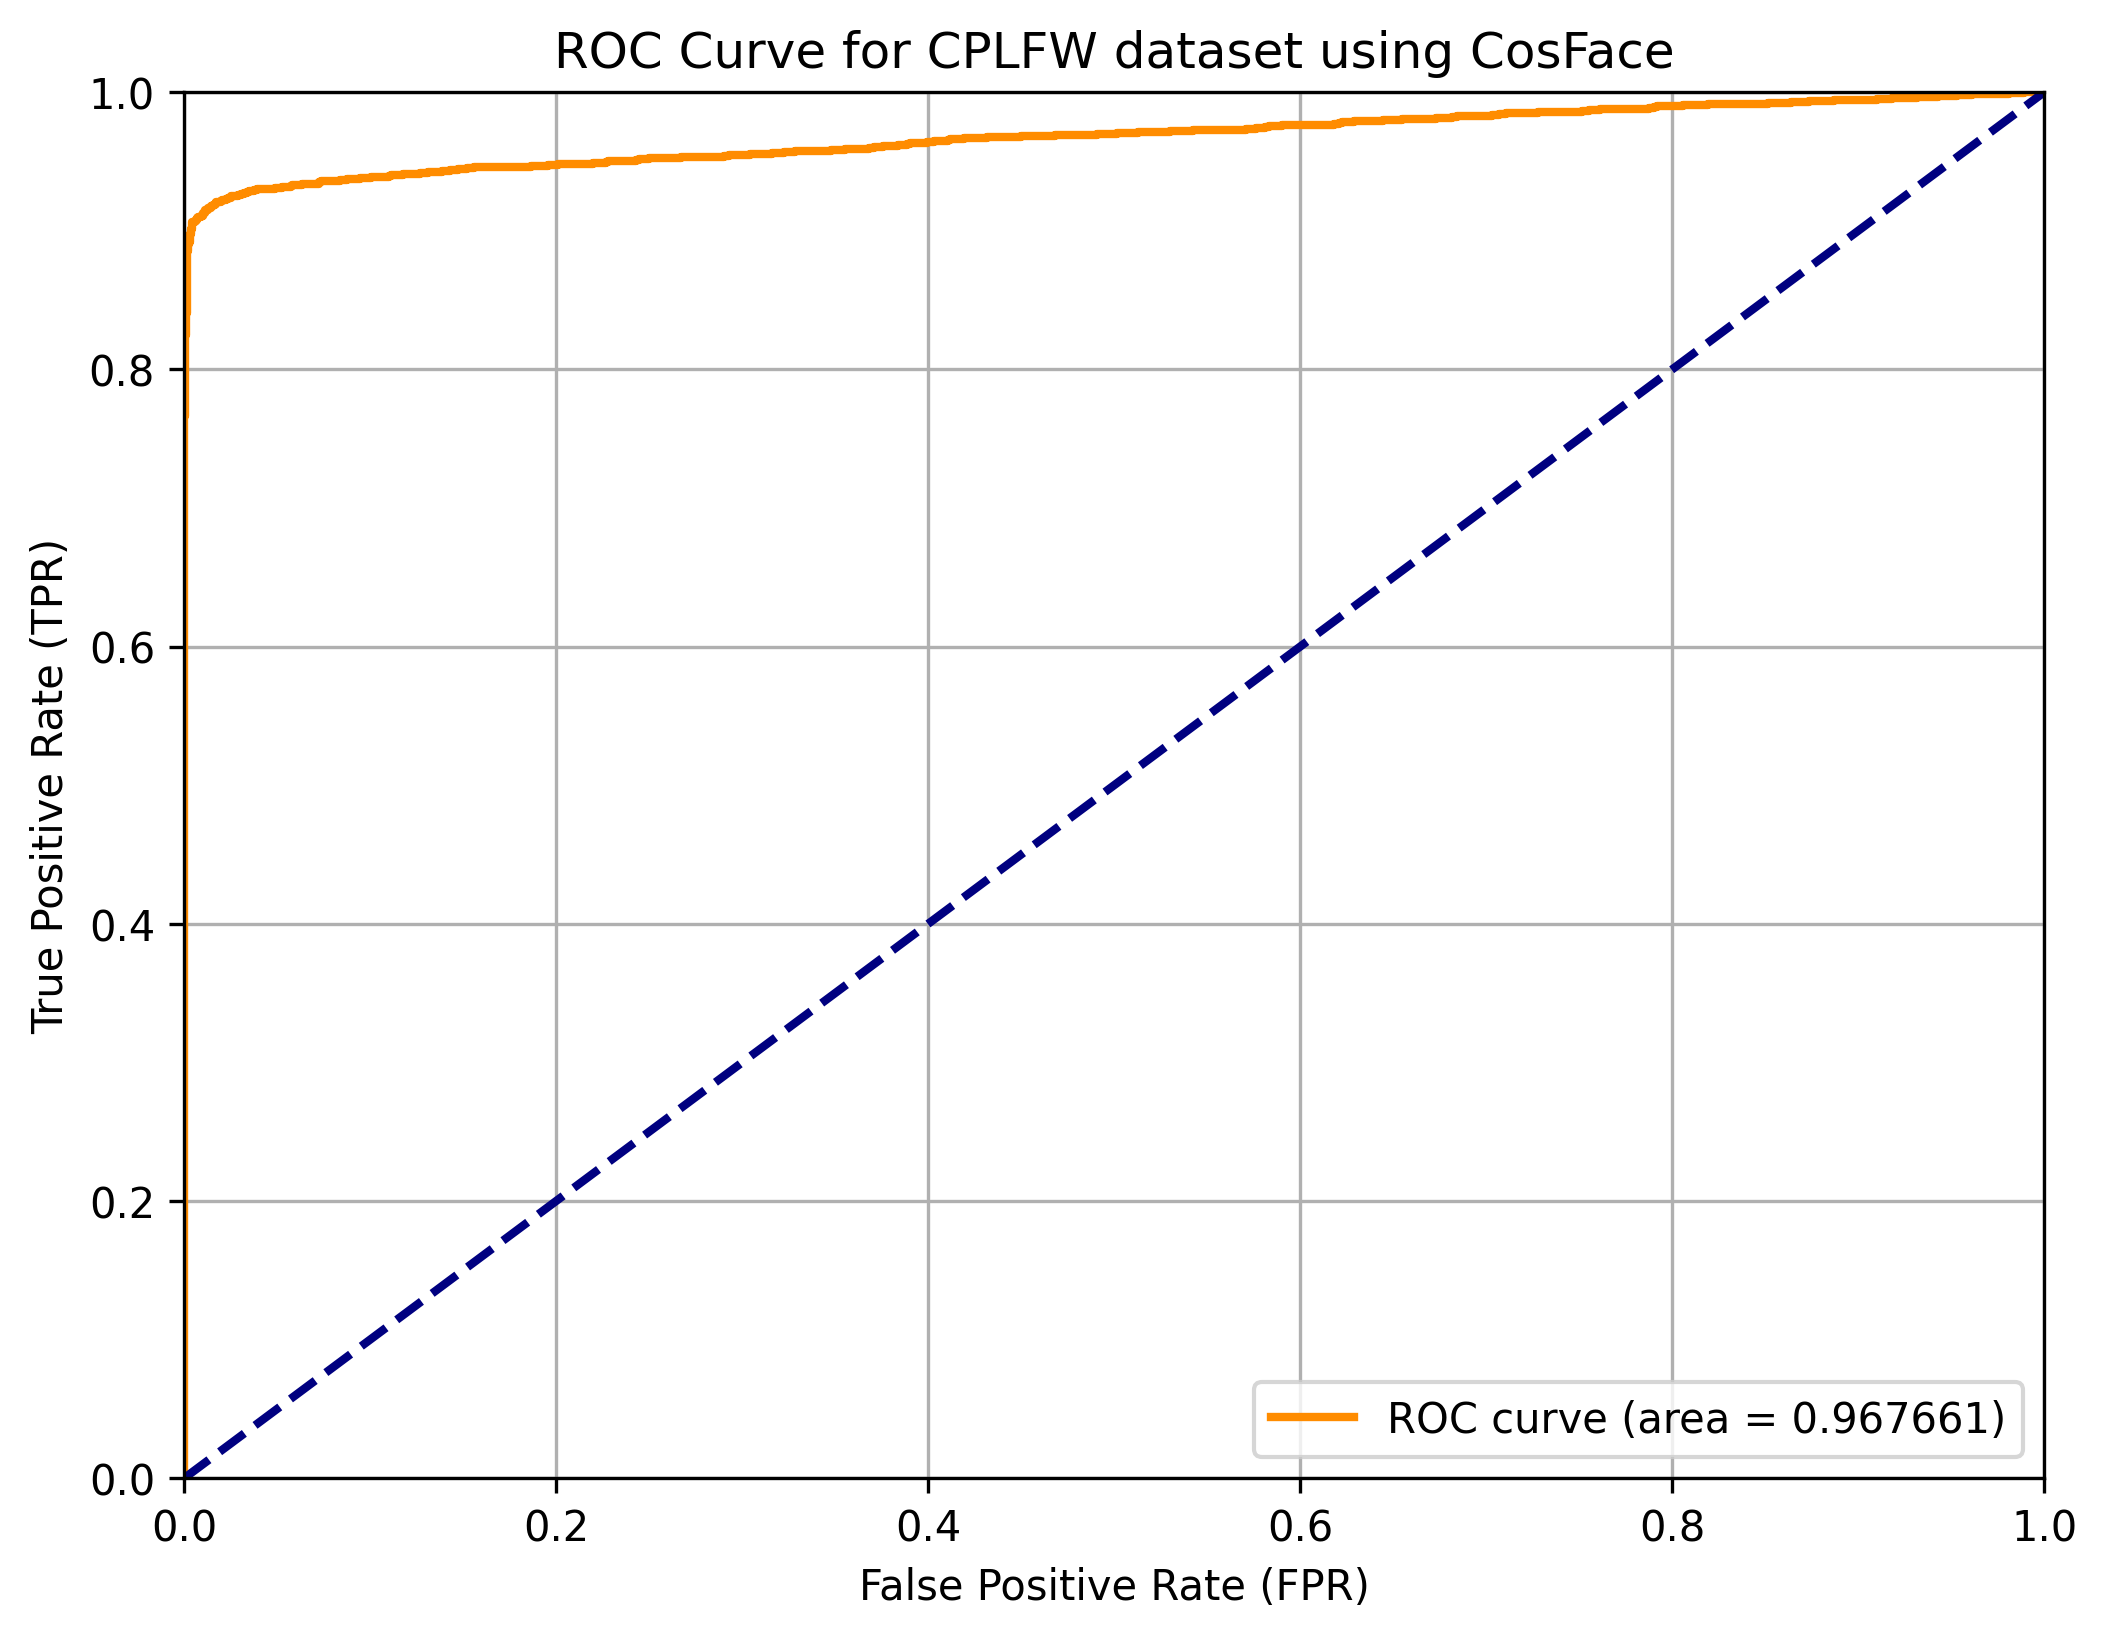

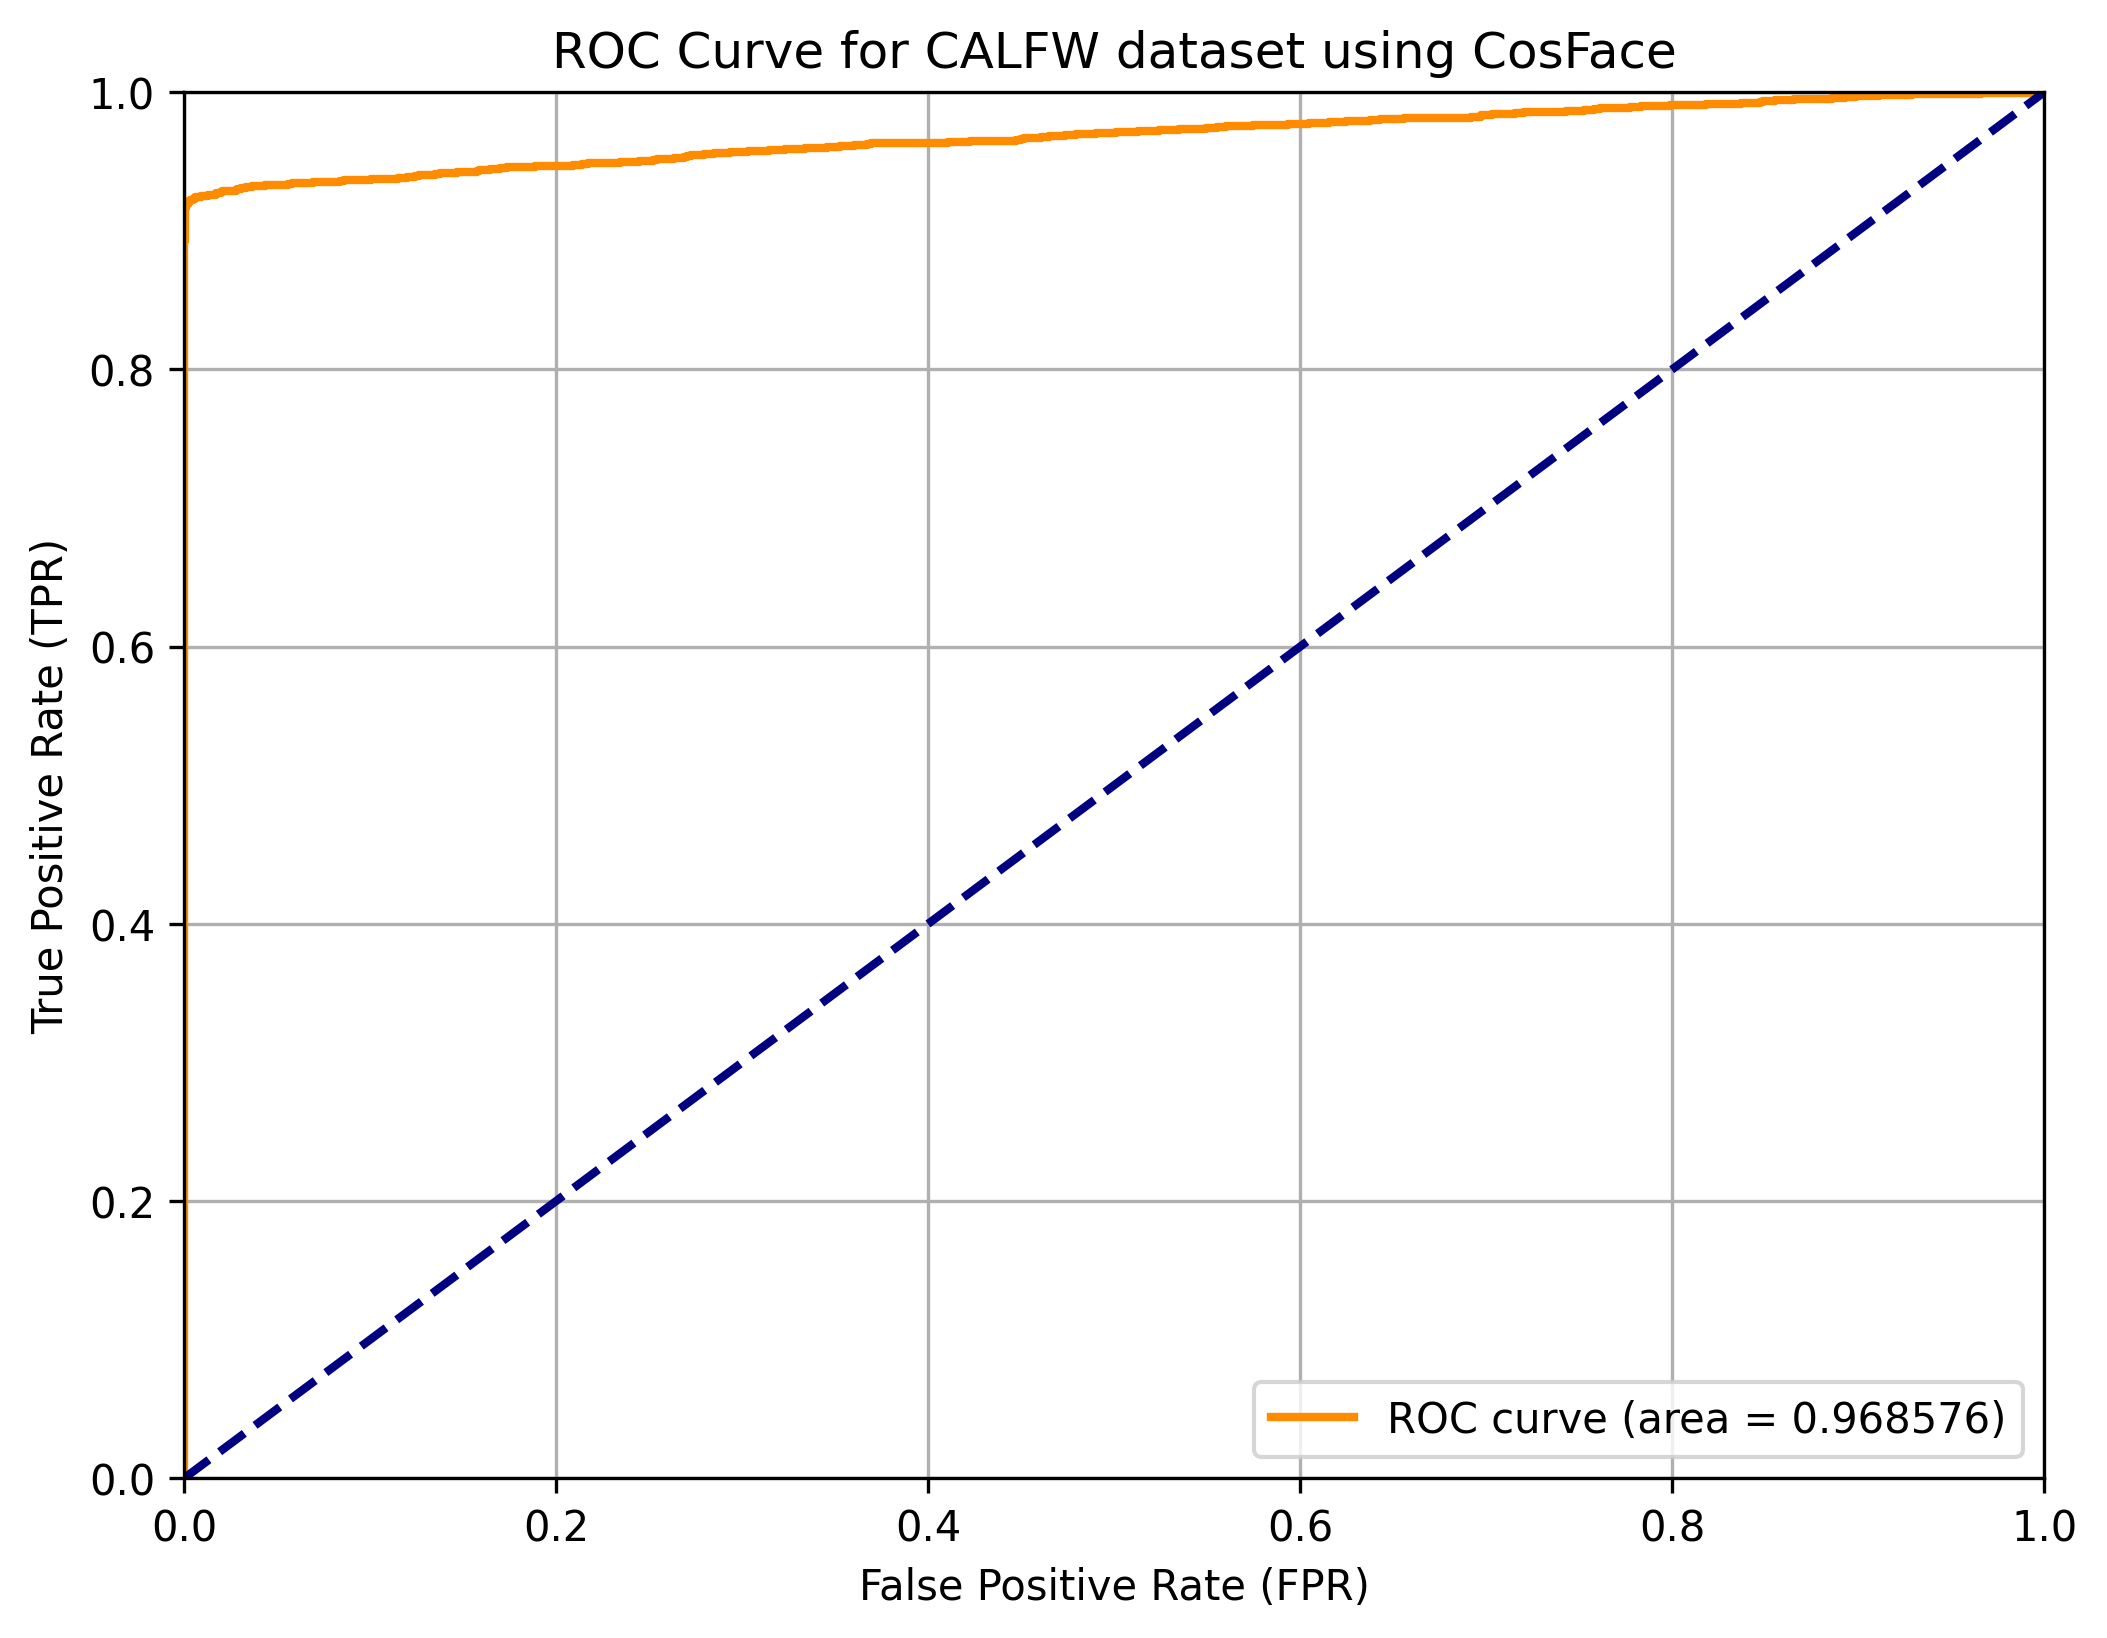

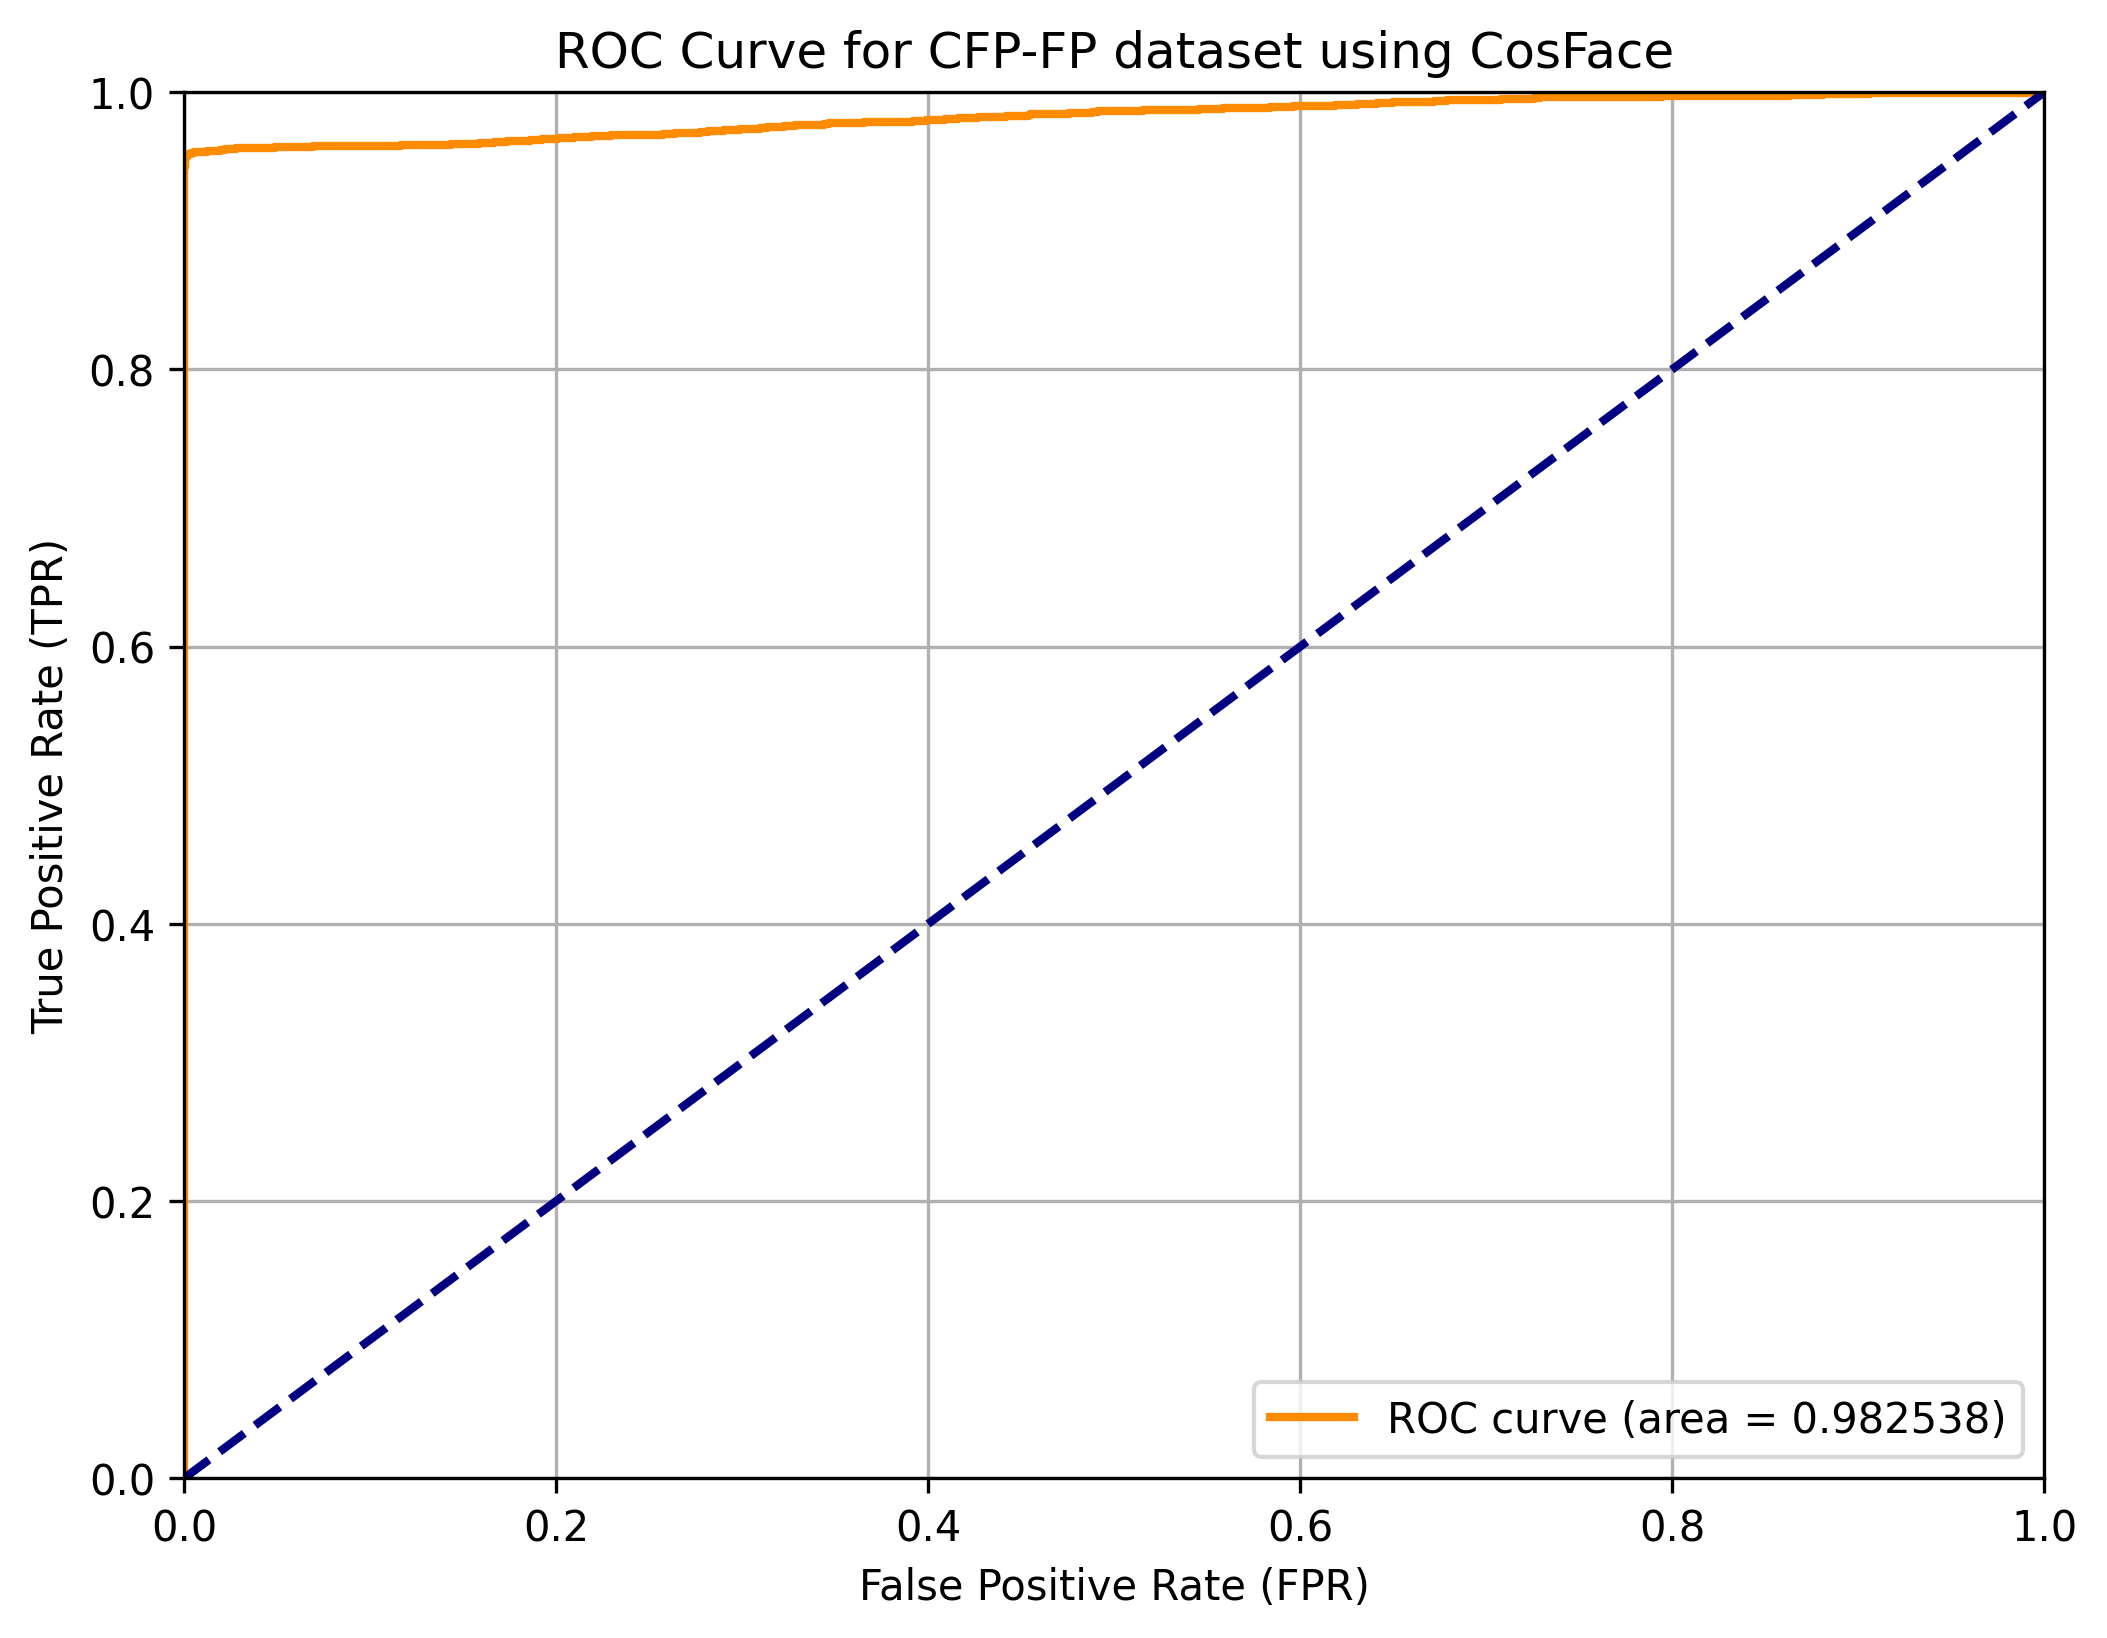

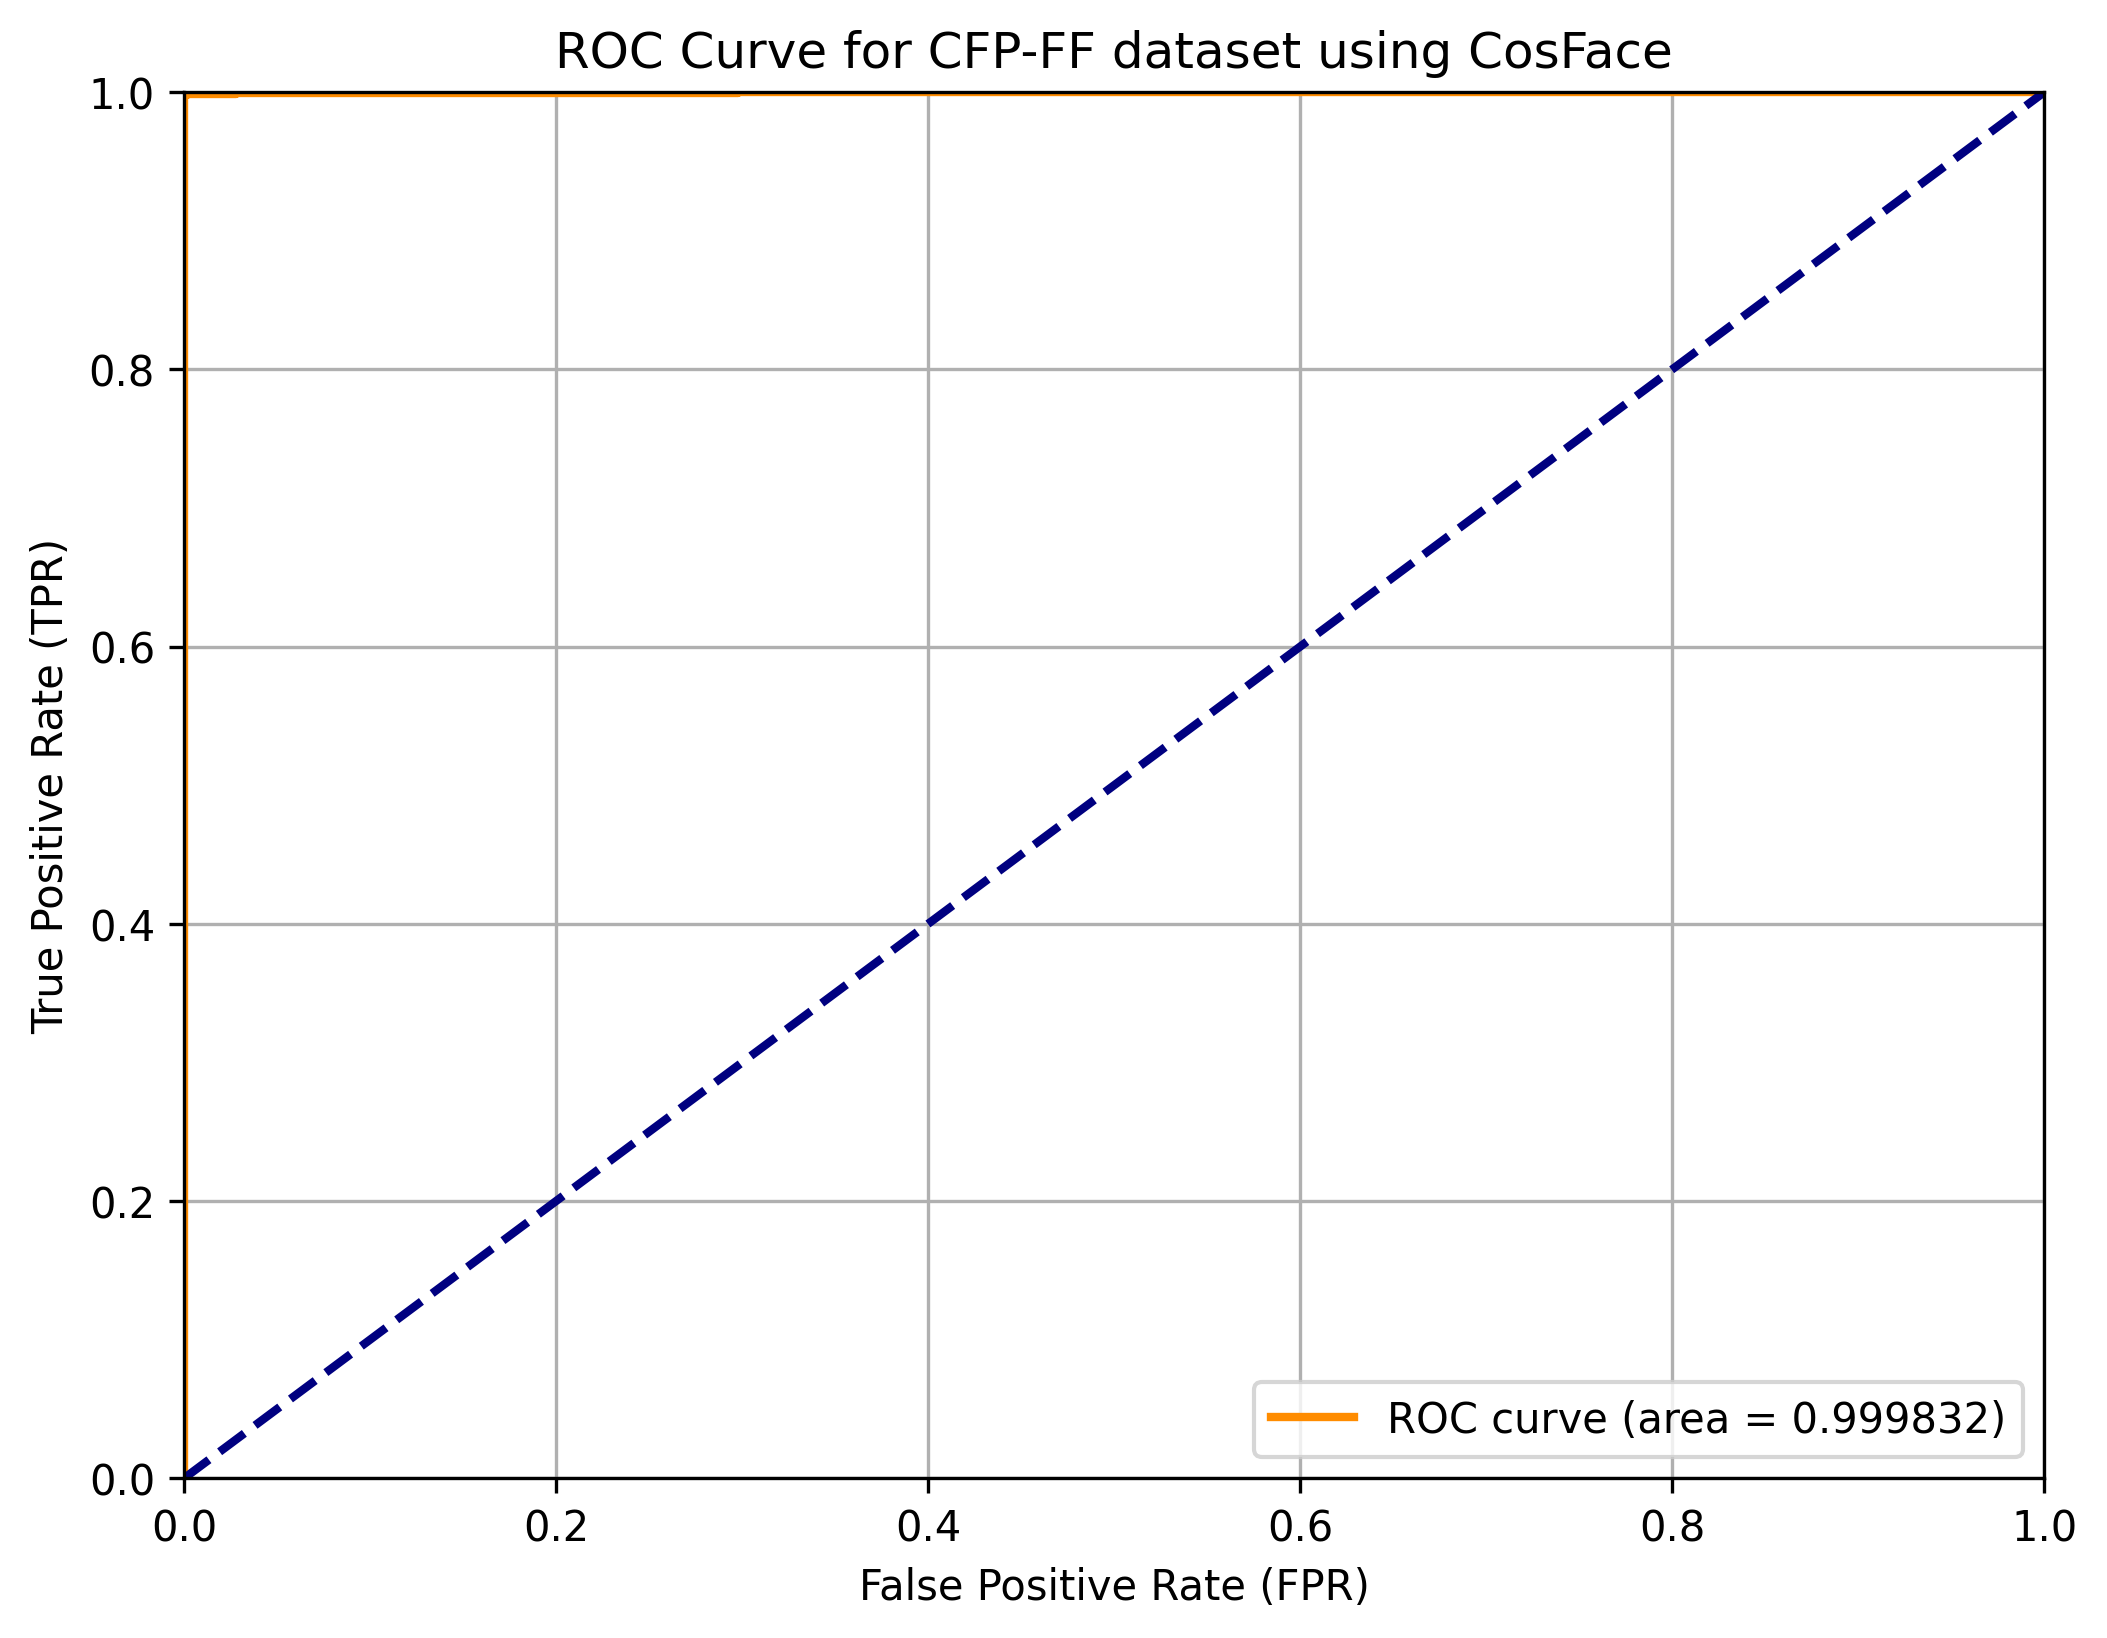

In [6]:
output_dir = os.path.join('data', 'results', 'evaluating different face recognition losses', 'cosface experiment using casia webface')

for key in metrics.keys():
    accuracy, precision, recall, f1_score, auc, fpr, tpr, thresholds = metrics[key]

    print(f'{key} dataset got:')
    print(f'\t{100 * accuracy:.8f} accuracy.')
    print(f'\t{100 * precision:.8f} precision.')
    print(f'\t{100 * recall:.8f} recall.')
    print(f'\t{100 * f1_score:.8f} f1_score.')

    roc_title = f'ROC Curve for {key} dataset using CosFace'
    # with open(os.path.join(output_dir, 'metrics.txt'), 'a') as f:
    #     f.writelines(f"""
    #       {key} dataset got:
    #       \t{100 * accuracy:.8f} accuracy.
    #       \t{100 * precision:.8f} precision.
    #       \t{100 * recall:.8f} recall.
    #       \t{100 * f1_score:.8f} f1_score.
    # """)
    plt.figure(figsize = figsize, dpi = dpi)
    plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC curve (area = {auc:.6f})')
    plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(roc_title)
    plt.legend(loc = 'lower right')
    plt.grid(True)
    plt.savefig(os.path.join(output_dir, f'{roc_title}.png'))


In [10]:
points = [88.8, 72.45, 81.18, 83.58, 95.92]

np.average(points)

np.float64(84.386)